# Part I - Explorative Analysis of Fordgobike Dataset to Understand Consumer Needs to Better Serve them
## By Akoanung Ayaba Abendong

> First i will begin by mentioning that i have chosen to work with the Fordgobike dataset simple because it has room to demonstrate some wangling skills besides the expected visualizations from the dataset. 


In [91]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load the Data and do Assessment

In [92]:
# rloading dataset of interest
df_fgb = pd.read_csv('gobike_data.csv')

In [93]:
df_fgb.shape

(183412, 16)

In [94]:
df_fgb.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [95]:
df_fgb.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [96]:
#lets gtake a look at the data types
df_fgb.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

- Observed time associated columns have object datatype instead of datetime

In [97]:
#lets assess the data information
df_fgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

- Noticed some columns have null values based on the completeness of the data. its important to pa attention to make apprioate adjustments

In [98]:
# let take a look at the column with null values
df_fgb.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [99]:
# lets check for duplicates
df_fgb.duplicated().sum()

0

In [100]:
# before doing some cleaning, lets make a copy of the dataframe
df_fgb_clean = df_fgb.copy()

In [101]:
# now lets keep only data that doesnt contain null values for all the columns concerned
df_fgb_clean = df_fgb_clean[df_fgb_clean['member_gender'].isnull() == False]
df_fgb_clean = df_fgb_clean[df_fgb_clean['start_station_id'].isnull() == False]

In [102]:
df_fgb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

- dataset seems not to have any null values left

In [103]:
# The datatype associate with date needs to be change to datetime
df_fgb_clean.start_time = pd.to_datetime(df_fgb_clean.start_time)
df_fgb_clean.end_time = pd.to_datetime(df_fgb_clean.end_time)
# lets equally change the datatype of bike_share_for_all_trip to boolean type from the object type
df_fgb_clean.bike_share_for_all_trip = (df_fgb_clean.bike_share_for_all_trip == 'Yes')

In [104]:
df_fgb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [105]:
# Analysis could also involve some more details which we can extract from other columns to form extra column such as 
#trip start date, trip_start_hour_of_day, trip_start_day_of_week, trip_start_month, trip_duration_in_minuts, as well as the age_of_members

df_fgb_clean['start_date'] = df_fgb_clean.start_time.dt.strftime('%Y-%m-%d')
df_fgb_clean['start_hour_of_day'] = df_fgb_clean.start_time.dt.strftime('%H')
df_fgb_clean['start_day_of_week'] = df_fgb_clean.start_time.dt.strftime('%A')
df_fgb_clean['start_month'] = df_fgb_clean.start_time.dt.strftime('%B')
df_fgb_clean['member_age'] = 2019 - df_fgb_clean['member_birth_year'] #Assuming 2019 is the year the data was collected
df_fgb_clean['duration_in_minute'] = df_fgb_clean['duration_sec']/60

In [106]:
df_fgb_clean.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_hour_of_day,start_day_of_week,start_month,member_age,duration_in_minute
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,False,2019-02-28,17,Thursday,February,35.0,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,False,2019-02-28,12,Thursday,February,47.0,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,False,2019-02-28,17,Thursday,February,30.0,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,True,2019-02-28,23,Thursday,February,45.0,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,False,2019-02-28,23,Thursday,February,60.0,29.883333


In [107]:
df_fgb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [108]:
# Sorting the columns is important to easily see part of the data that could be of interest to me with some order

columns_sorted = ['bike_id', 'user_type', 'member_birth_year', 'member_gender', 'member_age', 'start_station_id', 'start_time','start_date', 
                  'start_hour_of_day','start_day_of_week', 'start_month', 'start_station_name', 'start_station_latitude', 
                  'start_station_longitude','end_time', 'duration_sec','duration_in_minute','end_station_id', 'end_station_name', 
                  'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip' ]

df_fgb_clean = df_fgb_clean[columns_sorted]


In [109]:
# To be able to use this dtaframe as a dataset afterwards, it makes sense to save it
df_fgb_clean.to_csv('df_fgb_clean.csv')


In [110]:
df_fgb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   bike_id                  174952 non-null  int64         
 1   user_type                174952 non-null  object        
 2   member_birth_year        174952 non-null  float64       
 3   member_gender            174952 non-null  object        
 4   member_age               174952 non-null  float64       
 5   start_station_id         174952 non-null  float64       
 6   start_time               174952 non-null  datetime64[ns]
 7   start_date               174952 non-null  object        
 8   start_hour_of_day        174952 non-null  object        
 9   start_day_of_week        174952 non-null  object        
 10  start_month              174952 non-null  object        
 11  start_station_name       174952 non-null  object        
 12  start_station_la

In [111]:
df_fgb_clean.shape

(174952, 22)

### What is the structure of your dataset?

> The original dataset has 174952 fordgobike rides with 16 columns of diffrent atributes. The original dataset has benn modified nonetheless and now has 174952 forgobike rides with 22 columns with diffrent attributes which includes;
('bike_id', 'user_type', 'member_birth_year', 'member_gender', 'member_age', 'start_station_id', 'start_time','start_date', 
  'start_hour_of_day','start_day_of_week', 'start_month', 'start_station_name', 'start_station_latitude', 
  'start_station_longitude','end_time', 'duration_sec','duration_in_minute','end_station_id','end_station_name', 
   'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip')

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest includes  the start time,  start station, end station, user type , gender and age. and how this features affect trip duration is worth investigating.  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> How long each trip last can be achieved using the the start date/time and duration information for each trip. to determine the key customer groups, The member information, such as user type and gender, will help in achieving that; The age of the rider which has already been determine earlier using the the member birth year will be useful as the rides can be grouped into different groups to summarize bike usage data to see if there is any particular pattern associated with a particular group of riders. the hour, day, month and year f the start time will be useful as we can tell which hour, day, month and year is of interest in termas of riders trafic

## Univariate Exploration

#### Question
>How distributed are the ustomers to the various gender

#### Visualization

In [145]:

def myCountplot(df,xVar,hue=None,color=1, palette=None,order=None):
    '''This fuction is writen to avoid code repeatition. it will be called when needed
    '''
    
    #plot dimension
    plt.figure(figsize=[10, 6])
    #plot
    sns.countplot(data = df_fgb_clean , x = xVar, hue = hue, color = sns.color_palette('icefire')[color], palette=palette, order=order, edgecolor = 'black');
    xVar=xVar.replace('_',' ' ) # code replaces _ with space
    if hue:
        hue=hue.replace('_',' ')
    #adding title to plot
    plt.title(f'''Distribution of {xVar} {'by' if hue else ''} {hue if hue else ''}'''.title(), fontsize=14, weight = 'bold')
    plt.xlabel(xVar.title(), fontsize = 10, weight = 'bold')

    plt.ylabel('Frequency'.title(), fontsize=10, weight = 'bold')
    return myCountplot

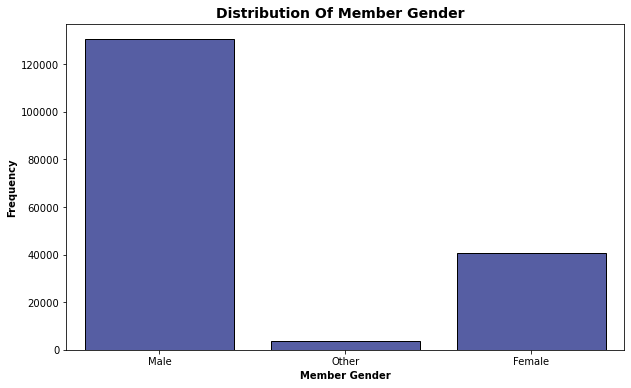

In [146]:
myCountplot(df_fgb_clean, 'member_gender');

 Observation
>From the plot, it is clear that most of the customers who took rides are males followed by females. the males rides are almost three times the female rides in number

#### Question

>How distributed are the user type within the dataset

#### Visualization

<function __main__.myCountplot(df, xVar, hue=None, color=1, palette=None, order=None)>

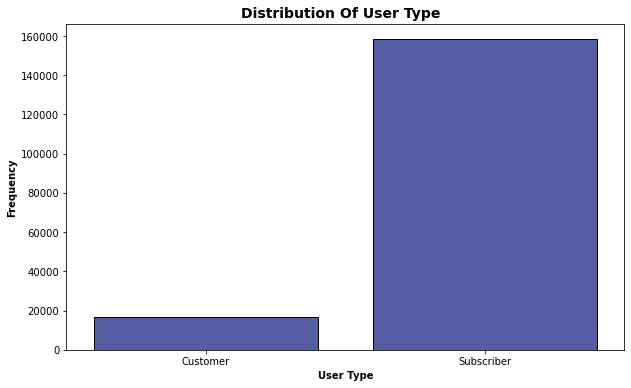

In [147]:
myCountplot(df_fgb_clean, 'user_type')

#### Observation
>Almost all the riders are subcribers (~160000) with only less than 20000 being customers 

#### Question:
> what is the distribution of the ages with the dataset?

#### Visualization

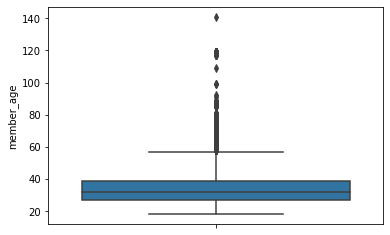

In [148]:
# to demostrate this, a box plot can be used as well as a voilin plot

sns.boxplot(data = df_fgb_clean, y = 'member_age');



 #### Observation:

> - The average age of bikers is around 30years. There hapen to be a rider with age 140, this doesnt seem realistic as it practically impossible for a 140 year old to ride a bike. such extremely high values might be drop from the dataset.
One can decide to limit the data to have only ages less than 70 as its makes it more realistic.
    

In [27]:
# lets limit the data to contain only data with age <= 70
df_fgb_clean = df_fgb_clean[df_fgb_clean['member_age'] <= 70]

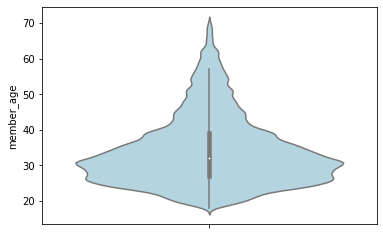

In [28]:
#ploting a voilin plot for a dataset with realistic ages
sns.violinplot(data = df_fgb_clean, y = 'member_age', color = 'lightblue');

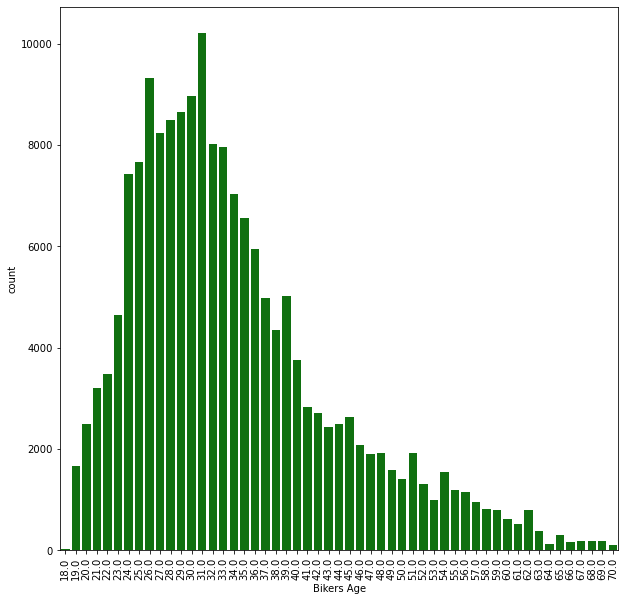

In [29]:
# A countplot will be useful to have a better display of the age distribution of the riders (with age limited to 70) 
sns.countplot(data = df_fgb_clean, x = 'member_age', color = 'green');
plt.xticks(rotation=90);
plt.xlabel('Bikers Age');
plt.gcf().set_size_inches(10,10)

#### Observation:
> Plot reveal may of the bikes are 30 years old. Especially at age 31 and the number of bikes reduces considerably with age.

#### Questions:
> How distributed were the rides time?
     - the idea here to see the length of time that rider rode and how distributed is are this times
        

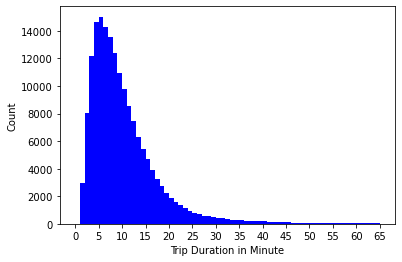

In [30]:

bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=df_fgb_clean, x='duration_in_minute', bins=bins,color = 'blue');
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute')
plt.ylabel('Count');

>#### Observation:
plot shows majority of rides lasted about 5-10 with very few exceeding 1hour

> #### Question:
    How distributed are the rides over the hours of the day

#### Visualization

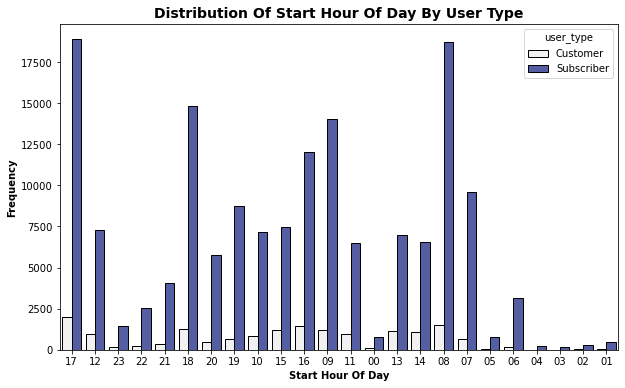

In [153]:
#ride distribution over hours of the day
myCountplot(df_fgb_clean,'start_hour_of_day', hue = 'user_type');


#### Observation:
> Plot shows most rides were taken 8am and 5pm and the least rides were taken in the early hours of the morning at 4am

#### Question:
>How distributed are the rides amongst the days of the week

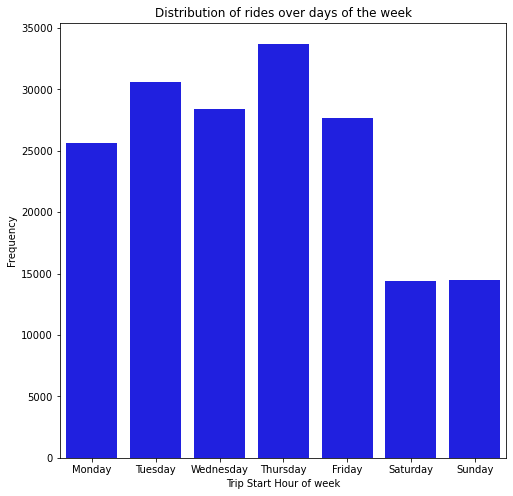

In [160]:
# trip distribution over week
# first lets define a list with the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

dayscat = pd.api.types.CategoricalDtype(ordered=True, categories=days_order)
df_fgb_clean['start_day_of_week'] = df_fgb_clean['start_day_of_week'].astype(dayscat)
sns.countplot(data=df_fgb_clean, x='start_day_of_week', color='blue');
plt.title('Distribution of rides over days of the week')
plt.xlabel('Trip Start Hour of week');
plt.ylabel('Frequency');
plt.gcf().set_size_inches(8,8)

> #### Observation:
Plot shows Thursday has the highest number of rides recorded followed by tuesday and least Saturday and Sunday so it makes sense to have more bike on Thursdays than on sundays

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From the analysis and visualizations done, one can say the were more trips on weekdays than at the weekend and the peak times of rides were between 8am and 5pm. It was also realised that the most users were subscribers and very few persons were not subcribers and Male riders outnumbered female riders. Majority of the users were young person between the gae 25-40 and very few riders whose ages were above 40. majority of the rides last about 5-10 mins with very few lasting up to an hour. i did perform some data transforming on the data to achive this visualizations by creating new columns with start time as demonstrated at the begining of the analysis

 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
>The was an unusaul distribution in the members age as there were members with age of about 140. this age isnt realistic as a 140year old can't possible ride a bike, therefore there was a need to adjust the column to limit the age to 70 that look more realistic


## Bivariate Exploration


#### Question:
>How does the age of the riders distribute across the days?

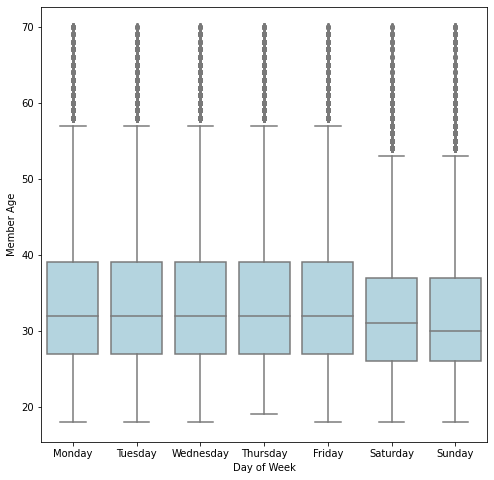

In [34]:
# one way to answer this question will be to plot the ages of the riders across the days of the weeek. 
# A box plot can be used to express this better

sns.boxplot(data=df_fgb_clean, x='start_day_of_week', y='member_age', color = 'lightblue');
plt.xlabel('Day of Week');
plt.ylabel('Member Age');
plt.gcf().set_size_inches(8,8)

#### Observation:
>From the above plot, the average age of users on weekdays is higher than weekend days

#### Question:
>How does user type vary across the days of the week
    

#### Visualization
To answer the above question, we will have to diplay the user types across the days of the week

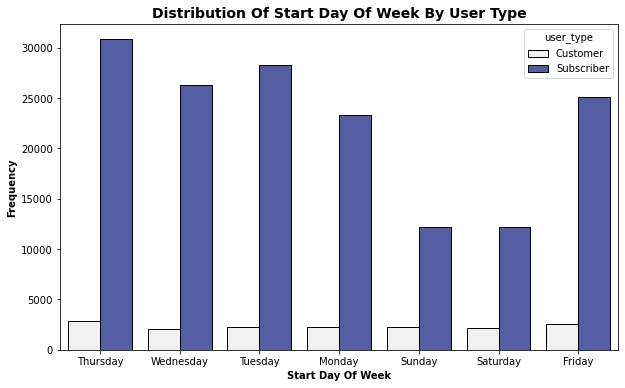

In [157]:
myCountplot(df_fgb_clean, 'start_day_of_week', hue = 'user_type');

#### Observation:
>Plot demonstrates that there are more users who are subcribers than just ordinary customers and the bar charts reveal they ride more on week days than on weekends. Unlike users who are just ordinary customers do not have a clear pattern of when they preferably ride. One can not say for sure what cause this patterns but i guess the reason why there are more subscribed customers is because the subcription deals are perhaps better that ordinary customer deals.

#### Question: 
>What is the average trip duration with respect to the days?

#### Visualization

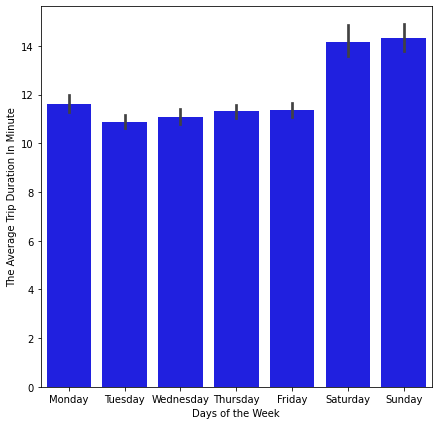

In [36]:
sns.barplot(data=df_fgb_clean, x='start_day_of_week', y='duration_in_minute', color = 'blue');
plt.xlabel('Days of the Week');
plt.ylabel('The Average Trip Duration In Minute');
plt.gcf().set_size_inches(7,7)

#### Observation
>Rides are considerably shorter on Monday through Friday but longer in the weekend. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> in this setion, most of the biplots were done on the usertype against other parameters. from the visualizations, its clear  There is significantly more subsribed users compared to users who are customers. Subscribers and customers have distinct behavior patterns when it comes to riding. Most trips taken by subscribers are on weekdays during peak hours for commuting, while customers tend to ride for leisure on weekends in the afternoon or early evenings. Subscribers are slightly older and tend to take longer rides on average compared to non-subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It's worth noting that subscribers who were ilustrated to be slightly older on average , take shorter and faster rides compared to customers. There is a significant difference in the length of trips taken by customers and subscribers. with customer trips considerably shorter that subscribed users.

## Multivariate Exploration



#### Question: 
> How does the average trip duration differ between the customers and the subcribers on weekdays

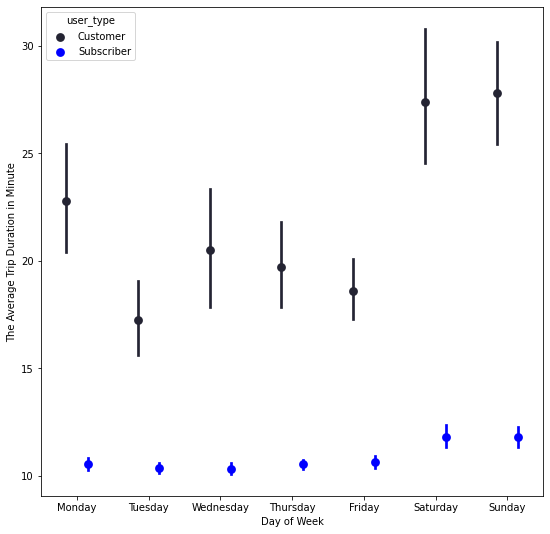

In [48]:
sns.pointplot(data=df_fgb_clean, x='start_day_of_week', y='duration_in_minute', hue='user_type', dodge=0.3, linestyles="", color = 'blue');
plt.xlabel('Day of Week');
plt.ylabel('The Average Trip Duration in Minute');
plt.gcf().set_size_inches(9,9)

#### Observation:
> The above plots combines average trip duration for the user with respect to days. From the plot, it is clear to see that the average trip duration for subscribers is shorter than for customers. and its also clear that all the user types had longer ride times on average in the weekends although those of subcribers remain condiserably shorter than customers 

#### Questio: 
What is the weekly hour usage of various users

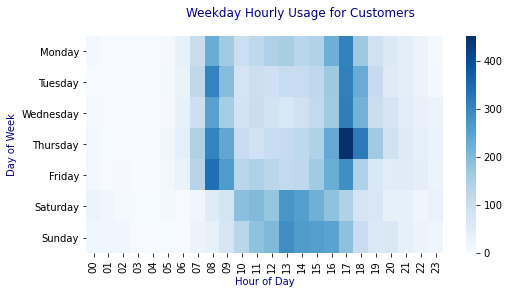

In [49]:
# a way we can aswer this is to create a heat map which show the density of users at the different time of the day across the week
customers = df_fgb_clean.query('user_type == "Customer"')
c = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
c = c.reset_index(name='count')
c = c.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sns.heatmap(c, cmap='Blues')

plt.xlabel('Hour of Day', color='darkblue')
plt.ylabel('Day of Week', color='darkblue')
plt.suptitle('Weekday Hourly Usage for Customers ',color='darkblue')
plt.gcf().set_size_inches(8,4);


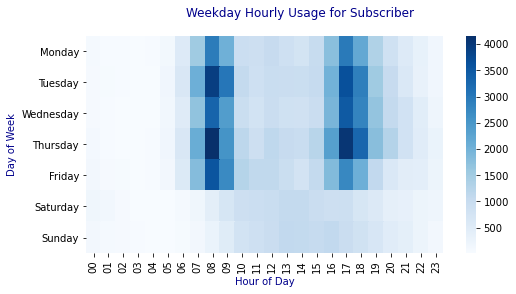

In [50]:
Subscriber = df_fgb_clean.query('user_type == "Subscriber"')
c = Subscriber.groupby(['start_day_of_week', 'start_hour_of_day']).size()
c = c.reset_index(name='count')
c = c.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sns.heatmap(c, cmap='Blues')
plt.xlabel('Hour of Day', color='darkblue')
plt.ylabel('Day of Week', color='darkblue')
plt.suptitle('Weekday Hourly Usage for Subscriber ',color='darkblue')
plt.gcf().set_size_inches(8,4);

#### Question:
    How distributed are the rides among the the users inline with the gender.

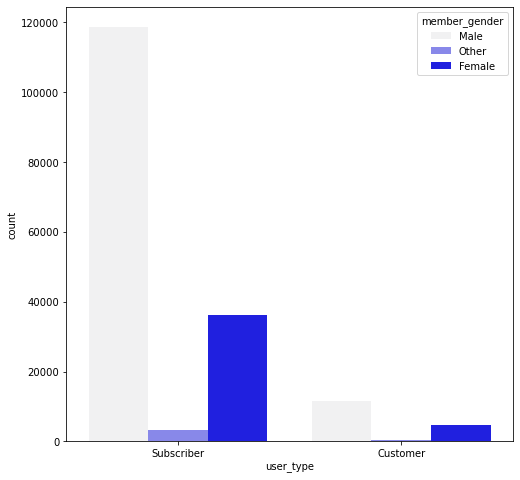

In [51]:
sns.countplot(data=df_fgb_clean, x="user_type", hue="member_gender", order=df_fgb_clean.user_type.value_counts().index,color='blue')
plt.gcf().set_size_inches(8,8)

#### Observation:
> From the above plot, it is clear that the male gender are the most riders in the two user categories  with the least 
from  those who did not  mention their sex thus, the males conclusively use the bike service more than females 


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration allows for the simultaneous examination of multiple variables and provides additional information, which improves the identification of patterns previously observed in bivariate and univariate studies. Male users tend to use the service more often than female users, and subscribers tend to use the service more on weekdays, possibly for work commutes. On the other hand, non-subscribing customers exhibit a more relaxed pattern of usage, using the bike-sharing system mostly on weekends and in the afternoons for leisure purposes.

### Were there any interesting or surprising interactions between features?

> Taking into account the relationship between the characteristics one can say fit together well and make sense, so there are no unexpected findings. The study found little difference in usage habits between male and female riders. However, it would be intriguing to examine any potential differences if there were more data available for female riders. The study only analyzed data from February, and it would be enlightening to see if there are any seasonal patterns in usage by looking at data from other months, specifically, whether usage increases during the summer or winter months.

## Conclusions
> Conclusively, the dataset proveded had litle modification to be done to it in terms of cleaning. Nonetheless, the dataset was tidyup by adding some new columns which were helpful to generate better insights from the data. the age of customers were also determine to have an idea about the riders and their age difference and it was noticed that very high age riders were in the dataset which did not seem to be a reality thus the columns for age was limited only to those whose ages were below 70years which is a more realistic age for riders. from the visualizations made from the dataset, there is little difference in usage habits between male and female riders. However, it would be intriguing to examine any potential differences if there were more data available for female riders. The study only analyzed data from February, and it would be enlightening to see if there are any seasonal patterns in usage by looking at data from other months, specifically, whether usage increases during the summer or winter months. 
